# SQLAlchemy, Sqlite, and Dates

## Setup

In [1]:
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
engine = create_engine("sqlite:///../Resources/dow.sqlite", echo=False)

In [5]:
engine.execute('SELECT * FROM dow LIMIT 5').fetchall()

[(1, 1, 'AA', '2011-01-07', 15.82, 16.72, 15.78, 16.42, 239655616, None),
 (2, 1, 'AA', '2011-01-14', 16.71, 16.71, 15.64, 15.97, 242963398, None),
 (3, 1, 'AA', '2011-01-21', 16.19, 16.38, 15.6, 15.79, 138428495, None),
 (4, 1, 'AA', '2011-01-28', 15.87, 16.63, 15.82, 16.13, 151379173, None),
 (5, 1, 'AA', '2011-02-04', 16.18, 17.39, 16.18, 17.14, 154387761, None)]

In [6]:
inspector = inspect(engine)
columns = inspector.get_columns('dow')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
quarter INTEGER
stock TEXT
date TEXT
open_price FLOAT
high_price FLOAT
low_price FLOAT
close_price FLOAT
volume INTEGER
percent_change FLOAT


## Reflect and query dates

In [7]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Dow = Base.classes.dow

In [8]:
session = Session(engine)

## Analysis

Analyze the Average prices (open, high, low, close) for all stocks in the Month of May

In [25]:
# Query for the stock and average prices (open, high, low, close) 
# for all stock in the month of May
# Sort the result by stock name
# YOUR CODE HERE
sel = [Dow.stock, 
       func.avg(Dow.open_price), 
       func.avg(Dow.high_price), 
       func.avg(Dow.low_price), 
       func.avg(Dow.close_price)]

session.query(*sel).filter(func.strftime("%m", Dow.date) == '04').\
group_by(Dow.stock).\
order_by(Dow.stock).all()

[('AA', 17.182, 17.733999999999998, 16.671999999999997, 17.176),
 ('AXP', 46.11, 47.272000000000006, 45.57000000000001, 46.815999999999995),
 ('BA', 73.752, 75.952, 72.61, 75.05999999999999),
 ('BAC', 13.045999999999998, 13.266, 12.746, 12.852),
 ('CAT', 109.626, 112.69800000000001, 106.59, 110.99600000000001),
 ('CSCO',
  17.178000000000004,
  17.650000000000002,
  16.875999999999998,
  17.235999999999997),
 ('CVX', 107.396, 109.48600000000002, 105.176, 108.35799999999999),
 ('DD', 55.00599999999999, 56.202, 53.92, 55.636),
 ('DIS', 42.226, 42.872, 41.352000000000004, 42.3),
 ('GE', 20.137999999999998, 20.601999999999997, 19.720000000000002, 20.194),
 ('HD', 37.54, 38.088, 37.028, 37.628),
 ('HPQ', 40.96, 41.734, 39.414, 40.660000000000004),
 ('IBM', 164.338, 167.358, 163.2, 166.67800000000003),
 ('INTC', 20.240000000000002, 21.142000000000003, 19.822, 20.82),
 ('JNJ', 60.42399999999999, 62.27600000000001, 60.234, 61.85999999999999),
 ('JPM', 45.628, 46.608000000000004, 44.86, 45.678)

TypeError: unhashable type: 'numpy.ndarray'

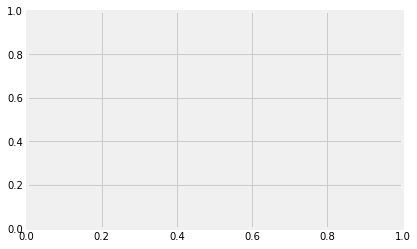

In [23]:
# Plot the Results in a Matplotlib bar chart
# YOUR CODE HERE

plt.bar(may_average)

### Bonus
Calculate the high-low peak-to-peak (PTP) values for `IBM` stock after `2011-05-31`. 
* Note: high-low PTP is calculated using `high_price` - `low_price`
* Use a DateTime.date object in the query filter
* Use a list comprehension or numpy's ravel method to unpack the query's list of tuples into a list of PTP values.
* Use matplotlib to plot the PTP values as a boxplot

In [ ]:
# Design a query to calculate the PTP for stock `IBM` after May, 2011
# YOUR CODE HERE
ptps

In [ ]:
# Load the query into a dataframe, set the index to the date, and plot the ptps
# YOUR CODE HERE